## Cheat sheet:
* Tab ist autocompletion
* d+d löscht
* i+i interrupted
* a / b für neue Zelle above/below ein 

## Let's do some imports

In [1]:
import numpy as numpy
import matplotlib.pyplot as pyplot

## And now for a plot ...

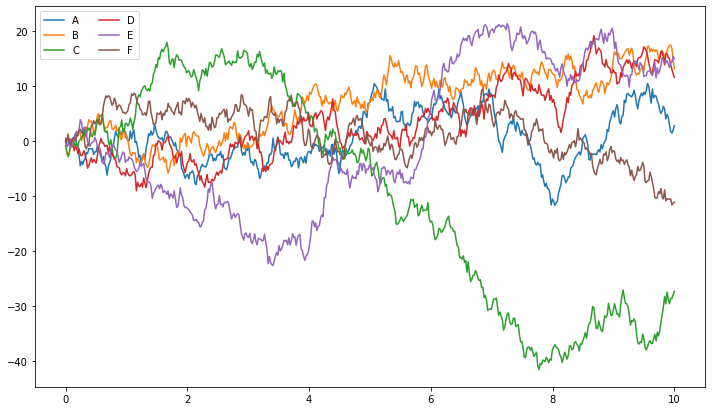

In [2]:
x = numpy.linspace(0, 10, 500)
y = numpy.cumsum(numpy.random.randn(500, 6), 0)
pyplot.figure(figsize=(12, 7))
pyplot.plot(x, y)
pyplot.legend('ABCDEF', ncol=2, loc='upper left')

## But actually, we want to analyze repos 

In [3]:
from git import Repo 
from datetime import datetime
import matplotlib as matplotlib

In [4]:
repo = Repo.init('scylla.git', bare=True)

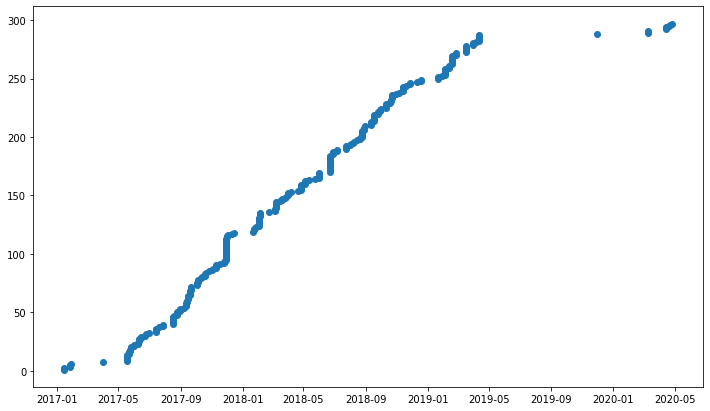

In [5]:
commits = repo.iter_commits()
timestamps = list(map(lambda commit: datetime.fromtimestamp(commit.committed_date), commits))
# for stamp in timestamps:
#    print(stamp)
count = list(range(len(timestamps), 0, -1))    
dates = matplotlib.dates.date2num(timestamps)
matplotlib.pyplot.figure(figsize=(12, 7))
matplotlib.pyplot.plot_date(dates, count)

Let's use the github API shall we?

In [6]:
import json
import requests
from pandas.io.json import json_normalize
import pandas as pandas

In [7]:
github_api = "https://api.github.com"
gh_session = requests.Session()
gh_session.auth = ('leonbein', '2d220172af07d73f3d69ef251f2d3b68954c9350')

In [8]:
url = github_api + '/user/repos?type=all&per_page=100'
commits = gh_session.get(url = url)
commits_json = commits.json()
commits_json = list(map(lambda x: x['full_name'], commits_json))
for each in commits_json:
    print(each)

BraunTom/TrueTurnTurnTurn
LeonBein/DummyRepository
LeonBein/MensaWidget
LeonBein/SmalltalkGitTesting
LeonBein/Squot
LeonBein/Talos
ShirleyNekoDev/Squot-CoAuthors


# Stuff from the other side

In [2]:
import numpy as numpy
import matplotlib.pyplot as pyplot

In [1]:
%load_ext autoreload
%aimport dbUtils

### Exploratory queries:

Map sample commits to "raw commits"

In [4]:
runQuery('''
    SELECT *
    FROM crm20.lb_sample_commits, ght.raw_commits
    WHERE lb_sample_commits.sha = raw_commits.sha
''')

,commit_id,sha,author_id,sha,login,timestamp,email,name,message,additions,deletions
0,616526760,6bb79b2e8956fe6493d7a65643a722a30e35ce3a,3211235,6bb79b2e8956fe6493d7a65643a722a30e35ce3a,bswalsh,2017-02-11T02:45:58Z,bswalsh@andrew.cmu.edu,bswalsh,Added sprites and the debugging ability to cli...,165,1548
1,616526734,2212ad2ec00f923c31f31879937e8a4d4ebfd657,3211235,2212ad2ec00f923c31f31879937e8a4d4ebfd657,bswalsh,2017-02-10T22:40:42Z,noreply@github.com,GitHub,Merge pull request #7 from eosofsky/Brian\n\na...,152,8
2,616526739,e914c2c85296ee26b3229bf22a5c12b9b721fb93,3211235,e914c2c85296ee26b3229bf22a5c12b9b721fb93,bswalsh,2017-02-12T16:42:53Z,bswalsh@andrew.cmu.edu,bswalsh,Adding sprite click ability and re-rendering s...,81,83
3,615193816,711660b5df1c82fb03e74b7539b547216d588c0b,2800979,711660b5df1c82fb03e74b7539b547216d588c0b,jmjuanes,2017-02-06T09:35:17Z,josemijuanes@gmail.com,jmjuanes,test/hello.js: updated test name,1,1
4,615193817,ed51dbf16af77d39181b3b5984c7bceb8f4ce3a1,2800979,ed51dbf16af77d39181b3b5984c7bceb8f4ce3a1,jmjuanes,2017-02-06T09:35:30Z,josemijuanes@gmail.com,jmjuanes,lib/body.js: check if is tty,4,0
...,...,...,...,...,...,...,...,...,...,...,...
103262,133304435,80d53cc1e4e3f362340a469968d3a7fa445f2799,4496948,80d53cc1e4e3f362340a469968d3a7fa445f2799,bineshdobhal,2014-07-03T16:44:12Z,bineshdobhal@gmail.com,Binesh Dobhal,Fresh Code\n\nFresh Code,31068,0
103263,616317927,47071a4bd747de144a28b5d9a58dab09cd025664,2800979,47071a4bd747de144a28b5d9a58dab09cd025664,jmjuanes,2017-02-12T12:28:58Z,josemijuanes@gmail.com,jmjuanes,package.json: v2.0.0,8,7
103264,616317928,c14845b997a9e9caae414da231db108aee203243,2800979,c14845b997a9e9caae414da231db108aee203243,jmjuanes,2017-02-12T12:28:44Z,josemijuanes@gmail.com,jmjuanes,Build v2.0.0,839,475
103265,616318041,1aae930f5cf1d15ba4aef8790f89ddf1d85e10e6,2800979,1aae930f5cf1d15ba4aef8790f89ddf1d85e10e6,jmjuanes,2016-12-08T19:31:47Z,josemijuanes@gmail.com,jmjuanes,src/_font.scss: added font mixin,20,0


Time used: 3774.4781992435455


,commit_id,sha,author_id,sha,login,timestamp,email,name,message,additions,deletions
0,616526760,6bb79b2e8956fe6493d7a65643a722a30e35ce3a,3211235,6bb79b2e8956fe6493d7a65643a722a30e35ce3a,bswalsh,2017-02-11T02:45:58Z,bswalsh@andrew.cmu.edu,bswalsh,Added sprites and the debugging ability to cli...,165,1548
1,616526734,2212ad2ec00f923c31f31879937e8a4d4ebfd657,3211235,2212ad2ec00f923c31f31879937e8a4d4ebfd657,bswalsh,2017-02-10T22:40:42Z,noreply@github.com,GitHub,Merge pull request #7 from eosofsky/Brian\n\na...,152,8
2,616526739,e914c2c85296ee26b3229bf22a5c12b9b721fb93,3211235,e914c2c85296ee26b3229bf22a5c12b9b721fb93,bswalsh,2017-02-12T16:42:53Z,bswalsh@andrew.cmu.edu,bswalsh,Adding sprite click ability and re-rendering s...,81,83
3,615193816,711660b5df1c82fb03e74b7539b547216d588c0b,2800979,711660b5df1c82fb03e74b7539b547216d588c0b,jmjuanes,2017-02-06T09:35:17Z,josemijuanes@gmail.com,jmjuanes,test/hello.js: updated test name,1,1
4,615193817,ed51dbf16af77d39181b3b5984c7bceb8f4ce3a1,2800979,ed51dbf16af77d39181b3b5984c7bceb8f4ce3a1,jmjuanes,2017-02-06T09:35:30Z,josemijuanes@gmail.com,jmjuanes,lib/body.js: check if is tty,4,0
...,...,...,...,...,...,...,...,...,...,...,...
103262,133304435,80d53cc1e4e3f362340a469968d3a7fa445f2799,4496948,80d53cc1e4e3f362340a469968d3a7fa445f2799,bineshdobhal,2014-07-03T16:44:12Z,bineshdobhal@gmail.com,Binesh Dobhal,Fresh Code\n\nFresh Code,31068,0
103263,616317927,47071a4bd747de144a28b5d9a58dab09cd025664,2800979,47071a4bd747de144a28b5d9a58dab09cd025664,jmjuanes,2017-02-12T12:28:58Z,josemijuanes@gmail.com,jmjuanes,package.json: v2.0.0,8,7
103264,616317928,c14845b997a9e9caae414da231db108aee203243,2800979,c14845b997a9e9caae414da231db108aee203243,jmjuanes,2017-02-12T12:28:44Z,josemijuanes@gmail.com,jmjuanes,Build v2.0.0,839,475
103265,616318041,1aae930f5cf1d15ba4aef8790f89ddf1d85e10e6,2800979,1aae930f5cf1d15ba4aef8790f89ddf1d85e10e6,jmjuanes,2016-12-08T19:31:47Z,josemijuanes@gmail.com,jmjuanes,src/_font.scss: added font mixin,20,0


Note: The following query filters by having more than 100 commits. This also filters out all organizations

In [ ]:
runQuery('''
    SELECT users.id, COUNT(commit_id), type
    FROM ght.users, 
        (SELECT *
        FROM crm20.lb_sample_commits, ght.commits
        WHERE commit_id = id) as commits
    WHERE users.id = author_id
    GROUP BY users.id
    HAVING COUNT(commit_id) >= 200
''')

Explore patches

In [19]:
runQuery('''
    SELECT *, SUBSTRING(name from '\.([^\.]*)$') AS file_ending, (changes - deletions) AS additions
    FROM ght.raw_patches
    LIMIT 100
''')

Time used: 0.21149420738220215


,sha,name,previous_filename,changes,deletions,status,patch,file_ending,additions
0,c3f2a28a51466be1282e757d32878cd0334f16a6,gulpfile.js,,42,15,modified,"@@ -10,7 +10,8 @@ var gulp = require('gulp'),\...",js,27
1,c3f2a28a51466be1282e757d32878cd0334f16a6,package.json,,1,0,modified,"@@ -25,6 +25,7 @@\n ""watchify"": ""^3.3.1""\n...",json,1
2,c3f2a28a51466be1282e757d32878cd0334f16a6,src/index.html,,1,0,modified,"@@ -4,4 +4,5 @@\n <link rel=""stylesheet"" hre...",html,1
3,c3f2a28a51466be1282e757d32878cd0334f16a6,src/js/app.js,,4,2,modified,"@@ -2,10 +2,10 @@ var multiply = require('./mu...",js,2
4,c3f2a28a51466be1282e757d32878cd0334f16a6,src/stylus/components/_components.styl,,2,1,modified,"@@ -1,2 +1,2 @@\n body \n- background yellow\...",styl,1
...,...,...,...,...,...,...,...,...,...
95,4e950fdf8cbd5a8b001be640046f98935c08ce61,gulp-plumber/gulp-plumber.d.ts,,2,1,modified,"@@ -41,7 +41,7 @@ declare module 'gulp-plumber...",ts,1
96,58fe0b0e72fbea01c059d507512cdedf30d5272d,gulp-plumber/gulp-plumber-tests.ts,,36,0,added,"@@ -0,0 +1,36 @@\n+/// <reference path=""../nod...",ts,36
97,58fe0b0e72fbea01c059d507512cdedf30d5272d,gulp-plumber/gulp-plumber.d.ts,,51,0,added,"@@ -0,0 +1,51 @@\n+// Type definitions for gul...",ts,51
98,4d137804c3bef2dcba7bbb7a1160906713b308c3,Definizione di Prodotto/documents/editor.tex,,1158,60,modified,"@@ -44,7 +44,7 @@ \subsubsection{premi/client/...",tex,1098


### Get patches for all sample commits

In [13]:
runQuery('''
    SELECT commit_id, lb_sample_commits.sha, (changes - deletions) AS additions, SUBSTRING(name from '\.([^\.]*)$') AS file_ending
    FROM crm20.lb_sample_commits, ght.raw_patches
    WHERE lb_sample_commits.sha = raw_patches.sha
''')

ProgrammingError: (psycopg2.errors.SyntaxError) syntax error at or near "GROUP"
LINE 6:     GROUP BY file_ending
            ^

[SQL: 
    SELECT COUNT(commit_id), SUBSTRING(name from '\.([^\.]*)$') AS file_ending
    FROM crm20.lb_sample_commits, ght.raw_patches
    WHERE lb_sample_commits.sha = raw_patches.sha AND changes = 0
    LIMIT 100
    GROUP BY file_ending
]
(Background on this error at: http://sqlalche.me/e/f405)

In [ ]:
runQuery('''
    SELECT MIN(created_at)
    FROM ght.commits
    LIMIT 10
''')

### Reference with srcml

In [202]:
import subprocess
from lxml import etree

repo = Repo.init(repoFolder+'scylla.git', bare=True, odbt=GitDB)
commit = repo.active_branch.commit
namespaces = {'src': 'http://www.srcML.org/srcML/src'}

start = time.time()
for obj in commit.tree.traverse():
    if obj.type == 'blob' and obj.name.endswith('.java'):
        content = subprocess.check_output('git --git-dir="./scylla.git" show %s:%s | xargs -0 srcml -l Java --text' % (commit.hexsha, obj.path), shell=True)
        tree = etree.fromstring(content)
        functions = tree.xpath('//src:function/src:block', namespaces=namespaces)
        print(list(map(lambda func: len(etree.tostring(func).decode('utf-8').split('\\n')), functions)))
        metric = 0
        print(obj.name+': '+str(metric))
end = time.time()
print('Time used: '+str(end - start))

src/main/java/de/hpi/bpt/scylla/Scylla.java
src/main/java/de/hpi/bpt/scylla/ScyllaScripts.java
src/main/java/de/hpi/bpt/scylla/SimulationManager.java
src/main/java/org/eclipse/wb/swing/FocusTraversalOnArray.java
src/test/java/de/hpi/bpt/scylla/ArgumentTests.java
src/test/java/de/hpi/bpt/scylla/SeedProvider.java
src/test/java/de/hpi/bpt/scylla/SimulationManagerForTests.java
src/test/java/de/hpi/bpt/scylla/SimulationTest.java
src/test/java/de/hpi/bpt/scylla/TestSeeds.java
src/test/java/de/hpi/bpt/scylla/TestUtils.java
src/test/java/de/hpi/bpt/scylla/TravisTests.java
src/main/java/de/hpi/bpt/scylla/GUI/CheckBoxList.java
src/main/java/de/hpi/bpt/scylla/GUI/CheckboxListPanel.java
src/main/java/de/hpi/bpt/scylla/GUI/Console.java
src/main/java/de/hpi/bpt/scylla/GUI/EditorPane.java
src/main/java/de/hpi/bpt/scylla/GUI/EditorTabTitlePanel.java
src/main/java/de/hpi/bpt/scylla/GUI/ExpandPanel.java
src/main/java/de/hpi/bpt/scylla/GUI/ExtendedListChooserPanel.java
src/main/java/de/hpi/bpt/scylla/GUI

In [208]:
content = subprocess.check_output('git --git-dir="./scylla.git" show %s:%s | xargs -0 srcml -l Java --text' % (commit.hexsha, 'src/main/java/de/hpi/bpt/scylla/Scylla.java'), shell=True)
tree = etree.fromstring(content)
functions = tree.xpath('//src:function', namespaces=namespaces)
for x in list(map(lambda func: etree.tostring(func).decode('utf-8'), functions)):
    print('')
    print(x)
print(list(map(lambda func: len(etree.tostring(func).decode('utf-8').split('\n')), functions)))
metric = 0
print('Scylla.java: '+str(metric))


<function xmlns="http://www.srcML.org/srcML/src"><specifier>public</specifier> <specifier>static</specifier> <type><name>void</name></type> <name>main</name><parameter_list>(<parameter><decl><type><name><name>String</name><index>[]</index></name></type> <name>args</name></decl></parameter>)</parameter_list> <throws>throws <argument><expr><name>IllegalArgumentException</name></expr></argument></throws> <block>{

        <if>if <condition>(<expr><call><name><name>Arrays</name><operator>.</operator><name>stream</name></name><argument_list>(<argument><expr><name>args</name></expr></argument>)</argument_list></call><operator>.</operator><call><name>anyMatch</name><argument_list>(<argument><expr><lambda><parameter_list type="pseudo"><parameter><decl><name>x</name></decl></parameter></parameter_list> -&gt; <block type="pseudo"><expr><call><name><name>x</name><operator>.</operator><name>contains</name></name><argument_list>(<argument><expr><literal type="string">"--help"</literal></expr></arg

In [5]:
{x : x*x for x in range(5)}

{0: 0, 1: 1, 2: 4, 3: 9, 4: 16}

# Repo Analysis Dump and Playground

In [84]:
import os
import numpy as numpy
import matplotlib.pyplot as pyplot
from git import Repo 
from datetime import datetime
import matplotlib as matplotlib
import subprocess
import time
from git.db import GitCmdObjectDB
from git.db import GitDB

In [1]:
from repoLibrarian import *

In [119]:
repo = Repo.init('scylla.git', bare=True, odbt=GitDB)

## Classes over time

Time used: 2.3841774463653564


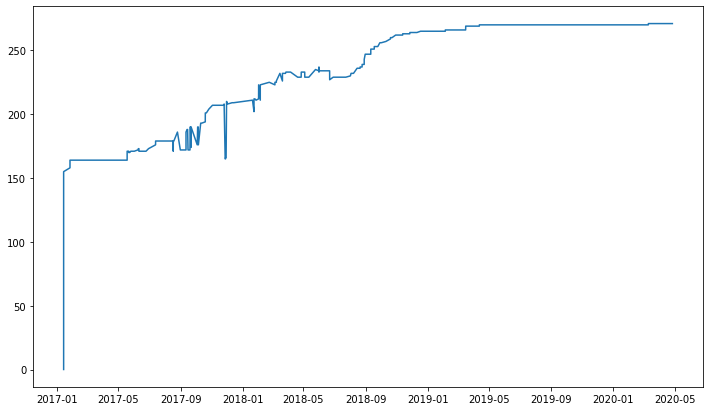

In [3]:
timestamps = list(map(lambda commit: datetime.fromtimestamp(commit.committed_date), repo.iter_commits()))
fileCounts = []

start = time.time()
for commit in repo.iter_commits():
    fileCount = 0
    for obj in commit.tree.traverse():
        if obj.type == 'blob' and obj.name.endswith('.java'):
            fileCount = fileCount + 1
    fileCounts.append(fileCount)
end = time.time()
print('Time used: '+str(end - start))
    
dates = matplotlib.dates.date2num(timestamps)
pyplot.figure(figsize=(12, 7))
pyplot.plot_date(dates, fileCounts, '-')

## Test classes over time

Time used: 2.4306929111480713


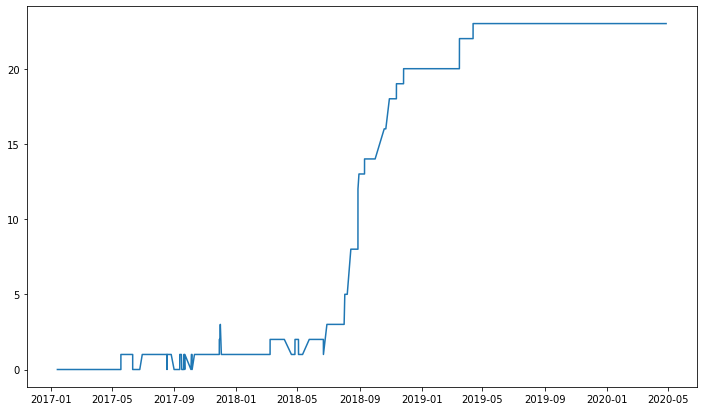

In [4]:
timestamps = list(map(lambda commit: datetime.fromtimestamp(commit.committed_date), repo.iter_commits()))
fileCounts = []

start = time.time()
for commit in repo.iter_commits():
    fileCount = 0
    for obj in commit.tree.traverse():
        if obj.type == 'blob' and obj.name.endswith('.java') and ('Test' in obj.name):
            fileCount = fileCount + 1
    fileCounts.append(fileCount)
end = time.time()
print('Time used: '+str(end - start))

dates = matplotlib.dates.date2num(timestamps)
pyplot.figure(figsize=(12, 7))
pyplot.plot_date(dates, fileCounts, '-')

## Print the srcml contents of a single file
git --git-dir="./Scylla.git" show ee00a205a2225ad73b0264cf7ba64be5c7044d0b:src/main/java/de/hpi/bpt/scylla/Scylla.java | xargs -0 srcml -l Java --text

In [5]:
commit = repo.active_branch.commit
for obj in commit.tree.traverse():
    if obj.type == 'blob' and obj.name.endswith('.java') and obj.name == 'Scylla.java':
        content = subprocess.check_output('git --git-dir="./scylla.git" show %s:%s | xargs -0 srcml -l Java --text' % (commit.hexsha, obj.path), shell=True).decode("utf-8")
        print(content)
        

<?xml version="1.0" encoding="UTF-8" standalone="yes"?>
<unit xmlns="http://www.srcML.org/srcML/src" revision="0.9.5" language="Java"><package>package <name><name>de</name><operator>.</operator><name>hpi</name><operator>.</operator><name>bpt</name><operator>.</operator><name>scylla</name></name>;</package>

<import>import <name><name>java</name><operator>.</operator><name>util</name><operator>.</operator><name>Arrays</name></name>;</import>

<comment type="block" format="javadoc">/**
 * Scylla is an extensible simulator for business processes in BPMN. &lt;br&gt;
 * This class initializes and runs the {@link SimulationManager} which simulates the processes based on the given input.
 * 
 * @author Tsun Yin Wong
 *
 */</comment>
<class><specifier>public</specifier> class <name>Scylla</name> <block>{
    <decl_stmt><decl><specifier>public</specifier> <specifier>static</specifier> <type><specifier>final</specifier> <name>String</name></type> <name>OS</name> <init>= <expr><call><name><name>S

# Combine gitpython and srcml

## Naive approach to calculate LoC over time

Time used: 6358.601209163666


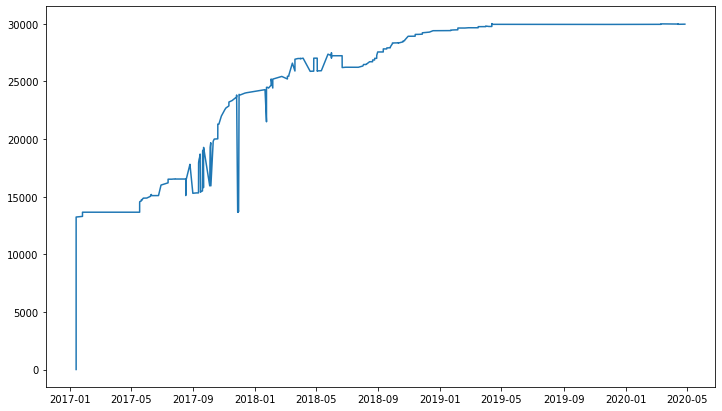

In [6]:
timestamps = list(map(lambda commit: datetime.fromtimestamp(commit.committed_date), repo.iter_commits()))
fileCounts = []

start = time.time()
for commit in repo.iter_commits():
    fileCount = 0
    for obj in commit.tree.traverse():
        if obj.type == 'blob' and obj.name.endswith('.java'):
            content = subprocess.check_output('git --git-dir="./scylla.git" show %s:%s | xargs -0 srcml -l Java --text' % (commit.hexsha, obj.path), shell=True).decode("utf-8")
            fileCount = fileCount + len(content.split('\n'))
    fileCounts.append(fileCount)

end = time.time()
print('Time used: '+str(end - start))

dates = matplotlib.dates.date2num(timestamps)
pyplot.figure(figsize=(12, 7))
pyplot.plot_date(dates, fileCounts, '-')

#### And now for average LoC per File:

In [ ]:
timestamps = list(map(lambda commit: datetime.fromtimestamp(commit.committed_date), repo.iter_commits()))
fileCounts = []

start = time.time()
for commit in repo.iter_commits():
    fileCount = 0
    lineCount = 0
    for obj in commit.tree.traverse():
        if obj.type == 'blob' and obj.name.endswith('.java'):
            content = subprocess.check_output('git --git-dir="./scylla.git" show %s:%s | xargs -0 -I $ srcml -l Java --text $ | wc -l' % (commit.hexsha, obj.path), shell=True).decode("utf-8")
            lineCount = lineCount + int(content)
            fileCount = fileCount + 1
    if fileCount == 0:
        fileCounts.append(0)
    else:
        fileCounts.append(lineCount / fileCount)

end = time.time()

Time used: 7572.929245471954


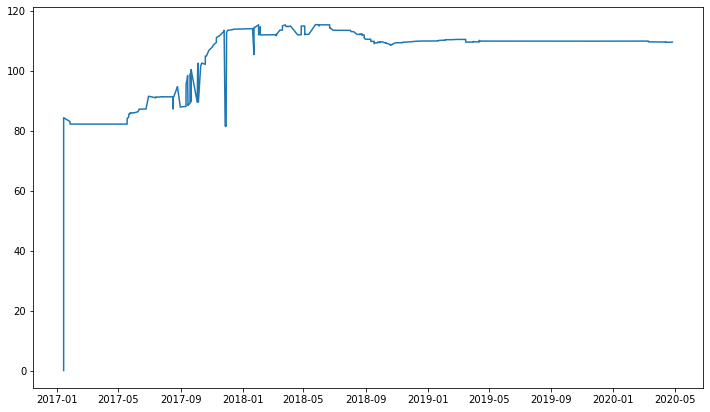

In [52]:
print('Time used: '+str(end - start))
dates = matplotlib.dates.date2num(timestamps)
pyplot.figure(figsize=(12, 7))
pyplot.plot_date(dates, fileCounts, '-')

### Tuning file traversal speed
* Calculating LoC for one single commit takes already very long!
* Removing the xargs to srcml does not change time significally
* Checking out improves time; but not enough that I would accept

=> Number of git shows must be reduced

In [70]:
start = time.time()
commit = repo.active_branch.commit
lineCount = 0
for obj in commit.tree.traverse():
    if obj.type == 'blob' and obj.name.endswith('.java'):
        content = subprocess.check_output('git --git-dir="./scylla.git" show %s:%s | xargs -0 srcml -l Java --text' % (commit.hexsha, obj.path), shell=True).decode("utf-8")
        lineCount = lineCount + len(content.split('\n'))
print(lineCount)
end = time.time()
print('Time used: '+str(end - start))

29976
Time used: 27.469611644744873


So let's try using wc

In [86]:
start = time.time()
commit = repo.active_branch.commit
lineCount = 0
for obj in commit.tree.traverse():
    if obj.type == 'blob' and obj.name.endswith('.java'):
        content = subprocess.check_output('git --git-dir="./scylla.git" show %s:%s | xargs -0 -I $ srcml -l Java --text $ | wc -l' % (commit.hexsha, obj.path), shell=True).decode("utf-8")
        lineCount = lineCount + int(content)
print(lineCount)
end = time.time()
print('Time used: '+str(end - start))

29705
Time used: 26.598869562149048


Or let's try checkouted repos ...

In [57]:
start = time.time()
commit = repo.active_branch.commit
lineCount = 0
for obj in commit.tree.traverse():
    if obj.type == 'blob' and obj.name.endswith('.java'):
        content = subprocess.check_output('git --git-dir="./scylla" show %s' % (obj.path), shell=True).decode("utf-8")
        lineCount = lineCount + int(content)
print(lineCount)
end = time.time()
print('Time used: '+str(end - start))

CalledProcessError: Command 'git --git-dir="./scylla" show src/main/java/de/hpi/bpt/scylla/Scylla.java' returned non-zero exit status 128.

Using Toni's Tip: (Thanks!)

In [87]:
start = time.time()
commit = repo.active_branch.commit
lineCount = 0
for obj in commit.tree.traverse():
    if obj.type == 'blob' and obj.name.endswith('.java'):
        with subprocess.Popen(['srcml', '-l', 'Java'], stdin=subprocess.PIPE, stdout=subprocess.PIPE) as srcml:
            srcml.stdin.write(obj.data_stream.read())
            srcml.stdin.close() 
            content = srcml.stdout.read().decode("utf-8")
        lineCount = lineCount + len(content.split('\n'))
print(lineCount)
end = time.time()
print('Time used: '+str(end - start))

29967
Time used: 23.731434106826782


In [116]:
start = time.time()
commit = repo.active_branch.commit
lineCount = 0
for obj in commit.tree.traverse():
    if obj.type == 'blob' and obj.name.endswith('.java'):
        content = obj.data_stream.read().decode("utf-8")
        lineCount = lineCount + len(content.split('\n'))
print(lineCount)
end = time.time()
print('Time used: '+str(end - start))

29423
Time used: 0.07674717903137207


In [76]:
start = time.time()
commit = repo.active_branch.commit
lineCount = 0
for obj in commit.tree.traverse():
    if obj.type == 'blob' and obj.name.endswith('.java'):
        content = os.popen('git --git-dir="./scylla.git" show %s:%s | xargs -0 -I $ srcml -l Java --text $ | wc -l' % (commit.hexsha, obj.path)).read()
        lineCount = lineCount + int(content)
print(lineCount)
end = time.time()
print('Time used: '+str(end - start))

29705
Time used: 27.872111558914185


Time used: 20.215256214141846


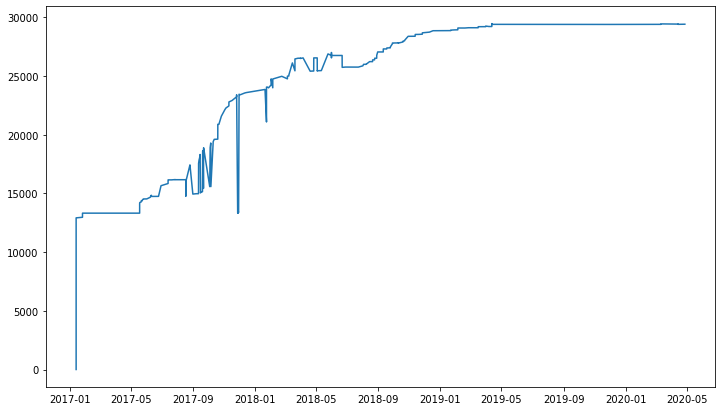

In [120]:
timestamps = list(map(lambda commit: datetime.fromtimestamp(commit.committed_date), repo.iter_commits()))
fileCounts = []

start = time.time()
for commit in repo.iter_commits():
    fileCount = 0
    for obj in commit.tree.traverse():
        if obj.type == 'blob' and obj.name.endswith('.java'):
            content = obj.data_stream.read().decode("utf-8")
            fileCount = fileCount + len(content.split('\n'))
    fileCounts.append(fileCount)

end = time.time()
print('Time used: '+str(end - start))

dates = matplotlib.dates.date2num(timestamps)
pyplot.figure(figsize=(12, 7))
pyplot.plot_date(dates, fileCounts, '-')

## Working: LoC/Method With Regex 

Time used: 42.52645564079285


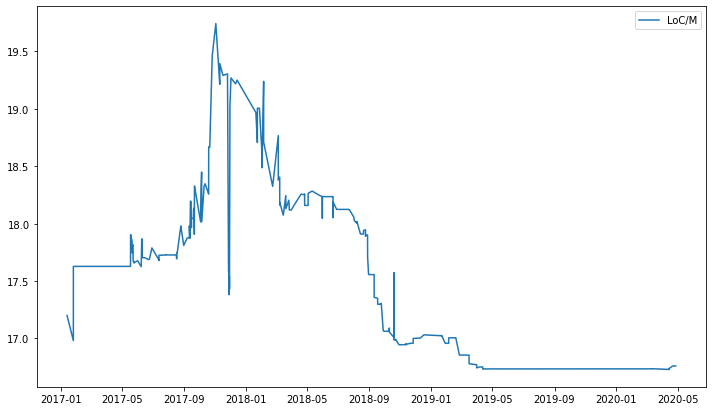

In [148]:
import re
commit = repo.active_branch.commit
classRegex = re.compile(r"class")
methodRegex = re.compile(r"(public|protected|private|static|\s) +[\w\<\>\[\]]+\s+(\w+) *\([^\)]*\) *(\{?|[^;])")

timestamps = []
metrics = []

start = time.time()
for commit in repo.iter_commits():
    fileCount = 0
    aggregatedMetric = 0
    for obj in commit.tree.traverse():
        if obj.type == 'blob' and obj.name.endswith('.java'):
            fileCount = fileCount + 1
            contentWithHeader = obj.data_stream.read().decode("utf-8")
            content = contentWithHeader.split('{', 1)[1]
            numMethods = len(methodRegex.findall(content))
            loc = len(content.split('\n'))
            metric = loc / numMethods if numMethods > 0 else 0
            aggregatedMetric = aggregatedMetric + metric
    metrics.append(aggregatedMetric/fileCount if fileCount > 0 else 0)
    timestamps.append(datetime.fromtimestamp(commit.committed_date))

end = time.time()
print('Time used: '+str(end - start))

metrics.pop()
timestamps.pop()

dates = matplotlib.dates.date2num(timestamps)
pyplot.figure(figsize=(12, 7))
pyplot.plot_date(dates, metrics, '-')
pyplot.legend(['LoC/M'])

In [3]:
dbUtils.runQuery('''
    SELECT *
    FROM pg_matviews
    WHERE schemaname = 'crm20'
    AND matviewname::TEXT LIKE 'lb%%'
''')

Time used: 0.10008764266967773


,schemaname,matviewname,matviewowner,tablespace,hasindexes,ispopulated,definition
0,crm20,lb_sample_commits_all,crm20,None,False,True,SELECT project_commits.commit_id\n FROM ght...
1,crm20,lb_sample_commits,crm20,None,False,True,"SELECT lb_sample_commits_all.commit_id,\n ..."
2,crm20,lb_changes,crm20,None,False,True,"SELECT lb_sample_commits.commit_id,\n lb_s..."
3,crm20,lb_languages,crm20,None,False,True,"SELECT lb_sample_commits.author_id,\n lb_c..."
4,crm20,lb_sample_projects,crm20,None,False,True,SELECT DISTINCT project_members.repo_id\n F...
5,crm20,lb_polyglots,crm20,None,False,True,"SELECT lb_java_users.author_id,\n lb_java_..."


In [29]:
dbUtils.runQuery('''
    CREATE OR REPLACE VIEW crm20.lb_changes_agg AS
        (SELECT commit_id, sha, ARRAY_AGG(loc) AS locs, ARRAY_AGG(language) AS languages
        FROM crm20.lb_changes
        GROUP BY commit_id, sha);
    SELECT commit_id, locs[ARRAY_POSITION(languages, 'java')]
    FROM crm20.lb_changes_agg
    WHERE 'java' = ANY(languages)
''')

Time used: 0.2812795639038086


,commit_id,locs
0,197017,1
1,197018,6
2,197019,1
3,197020,49
4,197021,39
...,...,...
9121,1412522419,2
9122,1413880842,51
9123,1413880874,79
9124,1413892402,2


## Number of Java Devs with secondary language
(1000 LoC in other language and)

In [79]:
dbUtils.runQuery('''
        SELECT lb_java_users.author_id, lb_java_users.loc AS javaLoC,  lb_java_users.first_written as javaStart, ARRAY_AGG(lb_languages.language) AS secondary_languages, ARRAY_AGG(lb_languages.loc) AS secLoC, ARRAY_AGG(lb_languages.first_written) as secStart
        FROM crm20.lb_java_users, crm20.lb_languages
        WHERE lb_java_users.author_id = lb_languages.author_id 
        AND (lb_languages.language = 'py' OR lb_languages.language = 'js') AND lb_languages.loc > 1000
        GROUP BY lb_java_users.author_id, lb_java_users.loc, lb_java_users.first_written
        HAVING lb_java_users.loc / 2 > ALL(ARRAY_AGG(lb_languages.loc))
        AND lb_java_users.first_written < ALL(ARRAY_AGG(lb_languages.first_written))
''')

Time used: 0.007347583770751953


,author_id,javaloc,javastart,secondary_languages,secloc,secstart
0,69602,149818,2012-07-06 20:21:47,[js],[14102],[2012-11-16 18:22:57]
1,1275950,79795,2014-01-21 13:25:31,[py],[3020],[2014-03-29 16:39:49]
2,1979246,34247,2013-06-06 05:28:21,[js],[7991],[2013-06-10 07:17:46]
3,2200247,18317,2014-09-10 21:07:58,[py],[2234],[2014-10-09 18:11:46]
4,2725277,31015,2014-05-28 08:19:28,[js],[9449],[2014-06-07 08:30:32]
5,3242981,20263,2014-01-30 16:13:29,[js],[2296],[2014-11-08 16:28:25]
6,4908425,13493,2014-08-15 04:49:30,[js],[5306],[2015-09-27 06:27:28]
7,5080586,42824,2014-08-25 10:38:05,[js],[18614],[2014-09-16 14:15:56]
8,9297920,17813,2015-09-22 00:45:02,[py],[1397],[2018-04-23 12:41:53]
9,10328444,48735,2016-03-09 21:08:22,[py],[4419],[2016-09-08 14:13:20]


In [8]:
dbUtils.runQuery('''
    SELECT matviewname::TEXT AS name
    FROM pg_matviews
    WHERE schemaname = 'crm20'
    AND matviewname::TEXT LIKE 'lb%%'
''')

Time used: 0.023155689239501953


,name
0,lb_sample_commits_all
1,lb_sample_projects
2,lb_sample_commits
3,lb_changes


# Tuning

In [89]:
%autoreload 2

In [78]:
def list_files_in_commit(commit):
    file_list = []
    dir_list = []
    stack = [commit.tree]
    while len(stack) > 0:
        tree = stack.pop()
        # enumerate blobs (files) at this level
        for b in tree.blobs:
            if isJavaFile(b):
                file_list.append(b.path)
        for subtree in tree.trees:
            stack.append(subtree)
    # you can return dir_list if you want directories too
    return file_list

In [25]:
def averageMetricPerCommitForRepo2(repoTuple, metricFunction, fileCountConsumer = repoAnalysis.safeDivision):
    (user, project) = repoTuple
    repo = getRepo(user, project)
    try:
        start = time.time()
        commitToMetric = collections.OrderedDict()
        for commit in reversed(list(repo.iter_commits())):
            fileCount = 0
            aggregatedMetric = 0
            for obj in commit.tree.traverse():
                if isJavaFile(obj):
                    fileCount = fileCount + 1
                    content = obj.data_stream.read().decode("CP437")#.decode("utf-8")
                    metric = metricFunction(content)
                    aggregatedMetric = aggregatedMetric + metric
            consumedMetric = fileCountConsumer(aggregatedMetric, fileCount)
            parent = commit.parents[-1].hexsha if len(commit.parents) == 1 else None
            commitToMetric[commit.hexsha] = (commit.committed_date, consumedMetric, parent)
        end = time.time()
        print('Time used for '+str(repoTuple)+': '+str(end - start))
    except Exception as e:
        print('Failed to analyze '+str(repoTuple)+': '+str(e))
    return Wrap(commitToMetric)

Time used for ('bptlab', 'scylla'): 28.137700080871582


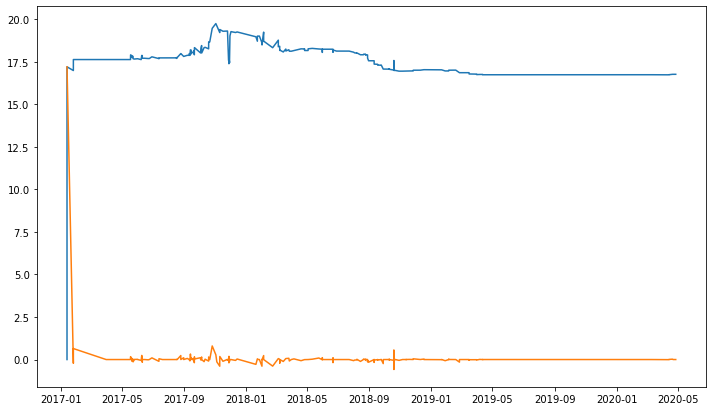

In [26]:
data = averageMetricPerCommitForRepo2(('bptlab', 'scylla'), repoAnalysis.locmOf).data
pyplot.figure(figsize=(12, 7))
deltas = deltasOf(data)
plotByDate(data.values())
plotByDate(deltas.values())

In [104]:
from git import Objects 

ImportError: cannot import name 'Objects' from 'git' (/mnt/brick/home/lbein/jupyter/lib/python3.8/site-packages/git/__init__.py)

In [22]:
%prun averageMetricPerCommitForRepo2(('bptlab', 'scylla'), repoAnalysis.locmOf)

Time used for ('bptlab', 'scylla'): 55.02015924453735
 

         7203932 function calls (7203924 primitive calls) in 55.097 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
    64859   20.157    0.000   20.157    0.000 {method 'findall' of 're.Pattern' objects}
    86357    2.600    0.000    2.600    0.000 {method 'readline' of '_io.BufferedReader' objects}
    86045    1.759    0.000    9.823    0.000 cmd.py:1054(__get_object_header)
   344181    1.366    0.000    2.035    0.000 cmd.py:384(__getattr__)
        1    1.234    1.234   55.093   55.093 <ipython-input-14-5eb8f1cdb17b>:1(averageMetricPerCommitForRepo2)
   112394    1.226    0.000   13.717    0.000 util.py:278(traverse)
   587523    1.125    0.000    1.125    0.000 {built-in method builtins.len}
    86044    1.123    0.000   14.277    0.000 db.py:40(stream)
    86044    1.007    0.000   12.076    0.000 cmd.py:1079(stream_object_data)
    86045    0.930    0.000    0.930    0.000 {method 'flush' of '_io.BufferedWriter' o

In [91]:
%prun averageMetricPerCommitForRepo2(('ESSICS', 'org.csstudio.display.builder'), repoAnalysis.locmOf)

Time used for ('ESSICS', 'org.csstudio.display.builder'): 6315.821995258331
 

         1171619199 function calls (1168788979 primitive calls) in 6315.950 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
  2357029  845.553    0.000  845.553    0.000 {method 'findall' of 're.Pattern' objects}
  5461182  622.436    0.000 1103.490    0.000 fun.py:621(apply_delta_data)
252555280  558.423    0.000  558.423    0.000 {method 'write' of 'mmap.mmap' objects}
16794917/14262492  316.098    0.000  664.328    0.000 stream.py:215(read)
140949238  267.361    0.000  267.361    0.000 {built-in method builtins.len}
  2292344  260.957    0.000 2433.863    0.001 stream.py:405(_set_cache_brute_)
 12141441  183.001    0.000  333.239    0.000 mman.py:104(use_region)
 42204920  175.195    0.000  266.706    0.000 util.py:119(byte_ord)
  8801310  168.564    0.000  897.650    0.000 pack.py:76(pack_object_at)
 12916875  136.942    0.000  136.942    0.000 {method 'decompress' of 'zlib.Decompress' objects}
 29930951  119.558    0.0

## Lab for new metrics

In [293]:
x = '''
/**
Cool javadoc that shows how cool the class is
*/
public class Foo extends Bar {//Hidden comment
    /**Documentation for a*/
    public static Object b;
    //Docu for b
    public String/*Mean inline comment*/ b;
    /* Another
    Multiline*/

    public static void main(String[] args) {
        //Comment
        //Comment
        System.out.println("Actual code goes here /*hihu*/")

    }
}
'''

#woComments = lambda content: re.sub(r"//.*|(\"(?:\\\\[^\"]|\\\\\"|.)*?\")|(?s)/\\*.*?\\*/", "\g<1> ", content);
stringRemover = re.compile(r"\".*?\"")
pattern = re.compile(r"//.*?\n|/\*.*?\*/", re.S)

matches = pattern.findall(stringRemover.sub("\"...\"", x))
print(sum(map(lambda x: len(x.rstrip().split("\n")), matches)))


11


In [288]:
%autoreload
data = averageMetricPerCommitForRepo(('bptlab', 'scylla'), repoAnalysis.indentPerLoc).data

Time used for ('bptlab', 'scylla'): 9.71684455871582


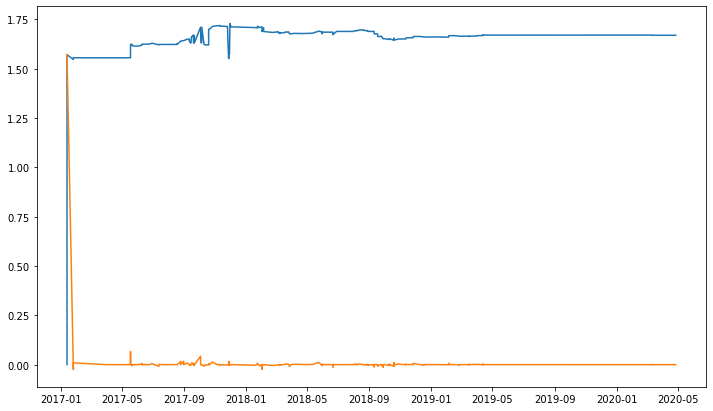

In [289]:
pyplot.figure(figsize=(12, 7))
deltas = deltasOf(data)
plotByDate(data.values())
plotByDate(deltas.values())

In [287]:
y = '''
    indent_1
	    indent_2
        indent_2
'''
indents = list(map(lambda line: len(line[:(len(line)-len(line.lstrip()))].replace('\t', '    ')) / 4, y.split('\n')))
avg = sum(indents)/len(indents)
print(avg)

1.0


In [294]:
repoAnalysis.numMethods(x)

1